# ObsID : 0945010135, SRCNUM : 28, Instru : EMOS2
**Simbad :** Active Galaxy Nucleus ([NAA2006] C761) https://simbad.cds.unistra.fr/simbad/sim-id?Ident=%405450903&Name=%5bNAA2006%5d%20C761&submit=submit

In [35]:
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import numpy as np

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

plt.rcParams['figure.figsize'] = [12,7]

Fit.statMethod = "cstat"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4

Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.

Fit statistic  : C-Statistic                59297.34     using 10 bins.

Test statistic : Chi-Squared              1.258080e+08     using 10 bins.
 Null hypothesis probability of 0.000000e+00 with 5 degrees of freedom
 Current data and model not fit yet.
Parameter delta values for fits will now be 0.0001 * parValue


## Load files

In [2]:
#AllData.clear()
spec = Spectrum(glob.glob('ObsID*_SRCNUM*_E*_spectrum_grp_cstat.fits')[0])

***Warning: Detected response matrix energy bin value = 0 (or neg).
     XSPEC will instead use small finite value (response file will not be altered).

1 spectrum  in use
 
Spectral Data File: ObsID0945010135_SRCNUM28_EMOS2_spectrum_grp_cstat.fits  Spectrum 1
Net count rate (cts/s) for Spectrum:1  1.863e-03 +/- 5.959e-04 (49.1 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-42
  Telescope: XMM Instrument: EMOS2  Channel Type: PI
  Exposure Time: 1.133e+04 sec
 Using fit statistic: cstat
 Using Background File                MOSbackground_spectrum.fits
  Background Exposure Time: 1.133e+04 sec
 Using Response (RMF) File            MOS.rmf for Source 1
 Using Auxiliary Response (ARF) File  MOS.arf



In [7]:
n_cts = 1.133e+04*1.863e-03

print("Number of counts =",n_cts)

if int(n_cts)<100:
    print()
    print("The low number of counts indicates that we should consider using cstat fit statistic instead of chi statistic.")

Number of counts = 21.10779

The low number of counts indicates that we should consider using cstat fit statistic instead of chi statistic.


## Plot spectrum

In [3]:
Plot.xAxis="keV"
Plot.device = "/xs"
Plot.xLog=True
Plot.yLog=True
Plot.addCommand("Rescale Y 0.00001 0.05")
Plot("data")
spec.ignore("**-0.2 12-**")

     1 channels (1) ignored in spectrum #     1
    31 channels (12,42) ignored in spectrum #     1



(-0.5, 860.5, 661.5, -0.5)

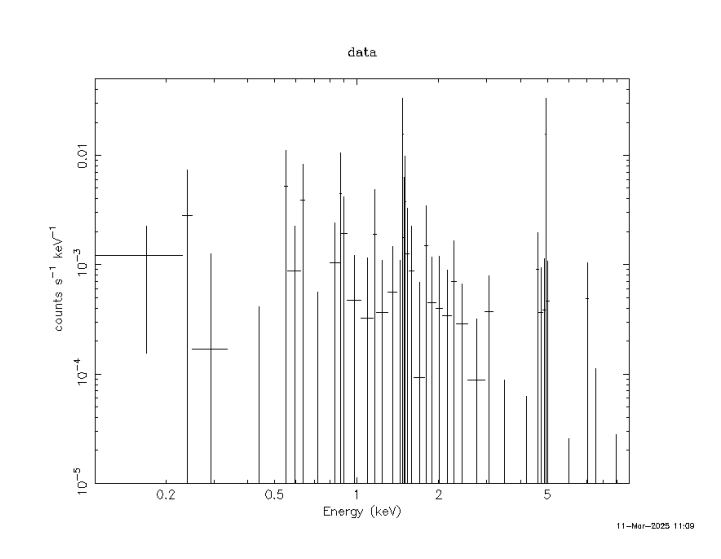

In [4]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum2.png')[0])
plt.imshow(img)
plt.axis('off')

### Black body model

In [18]:
AllModels.clear()
mo = Model("tbabs*bbody")
mo.bbody.norm = 0.01
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
plt.show()


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic                24828.25     using 10 bins.

Test statistic : Chi-Squared              2.313805e+07     using 10 bins.
 Null hypothesis probability of 0.000000e+00 with 7 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : C-Statistic                194.2840     using 10 bins.

Test statistic : Chi-Squared                2249.801     using 10 bins.
 Null hypothesis probability of 0.000e+00 with 7 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
C-Statistic  |beta|/N    Lvl         

(-0.5, 859.5, 660.5, -0.5)

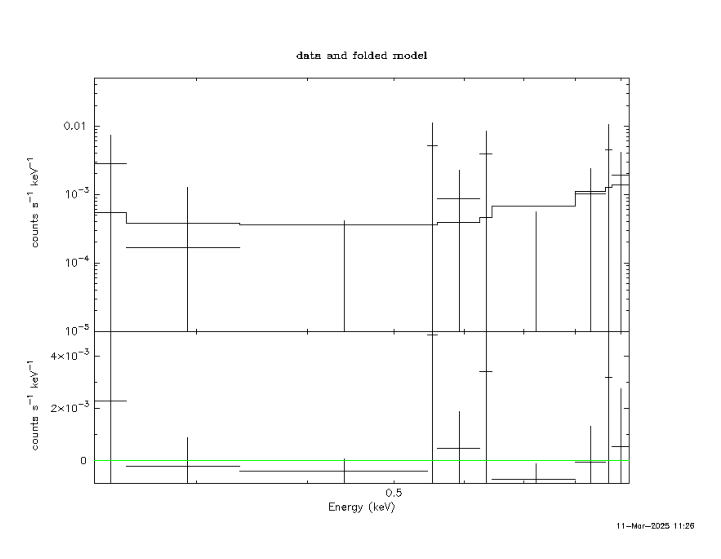

In [17]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_bbody2.png')[0])
plt.imshow(img)
plt.axis('off')

### Bremsstrahlung model

In [21]:
AllModels.clear()
mo = Model("tbabs*bremss")
mo.bremss.norm = 0.001
Fit.perform()
Plot.device = "/xs"
Plot("data resid")


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic                21135.85     using 10 bins.

Test statistic : Chi-Squared              1.704639e+07     using 10 bins.
 Null hypothesis probability of 0.000000e+00 with 7 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : C-Statistic                  8.2387     using 10 bins.

Test statistic : Chi-Squared                 12.9670     using 10 bins.
 Null hypothesis probability of 7.2917e-02 with 7 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
C-Statistic  |beta|/N    Lvl       

(-0.5, 860.5, 660.5, -0.5)

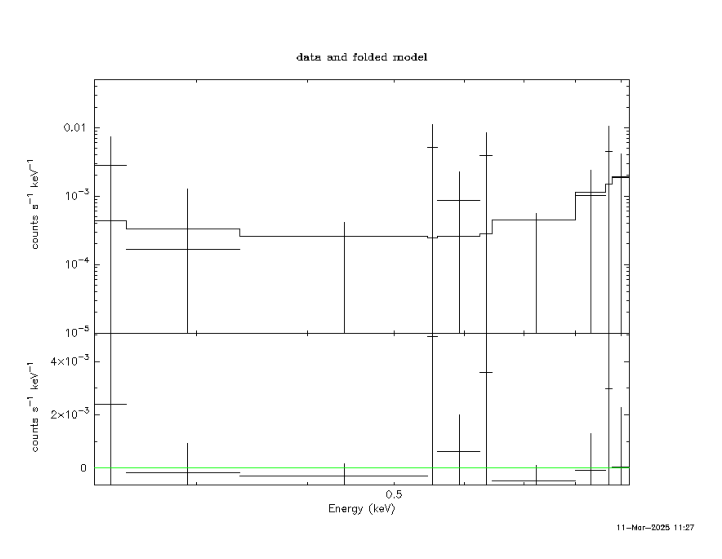

In [22]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_bremss2.png')[0])
plt.imshow(img)
plt.axis('off')

### Apec model

In [23]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic                42292.95     using 10 bins.

Test statistic : Chi-Squared              1.014695e+08     using 10 bins.
 Null hypothesis probability of 0.000000e+00 with 7 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
C-Statistic  |beta|/N    Lvl          1:nH          2:kT        5:norm
18186.4      29654.3      -3      0.192841       46.4521      0.249380
16708.7      19059.9 

(-0.5, 857.5, 660.5, -0.5)

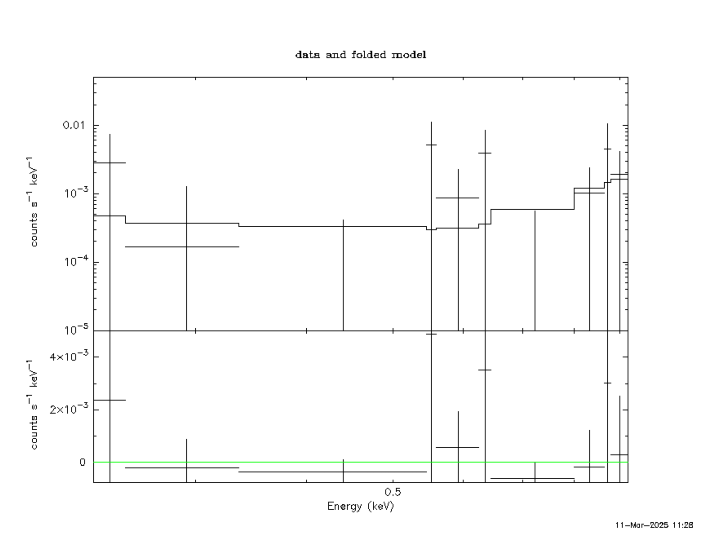

In [24]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_apec2.png')[0])
plt.imshow(img)
plt.axis('off')

### Powerlaw model

In [25]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic                34333.82     using 10 bins.

Test statistic : Chi-Squared              4.289725e+07     using 10 bins.
 Null hypothesis probability of 0.000000e+00 with 7 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
C-Statistic  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
44.2396      11741.6      -2       511.648      -2.22989      0.491075
6.97522      30.4628      -3       88.6464       1.14558      0.221830
6.21333      2.91805      -2       82.1517       1.35959      0.162982
6

(-0.5, 857.5, 661.5, -0.5)

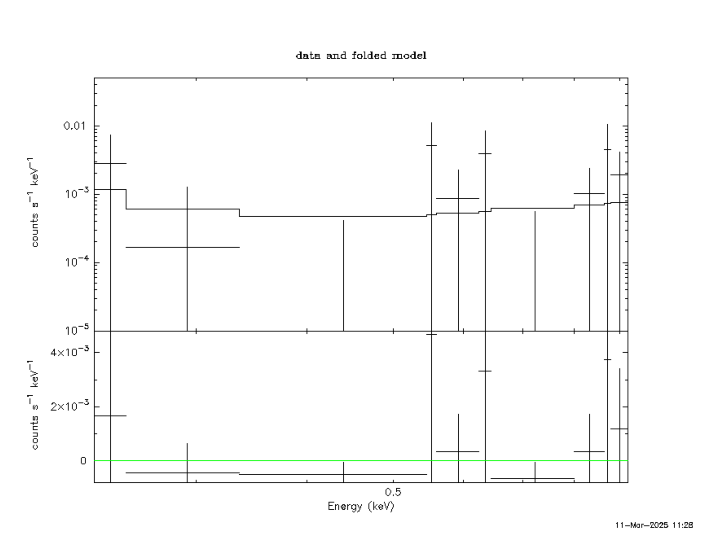

In [26]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_powerlaw2.png')[0])
plt.imshow(img)
plt.axis('off')

## ESASky

On ESASky, we observe 2 close sources a purple source and a green source. EPIC points to the system but GAIA has two pointers. https://sky.esa.int/esasky/?target=53.891302510636216%20-27.553110412917224&hips=XMM-Newton+EPIC+color&fov=0.091958931009&projection=SIN&cooframe=J2000&sci=true&lang=fr

``EPIC Stack``

- Stack Catalogue name : 4XMMs J033533.9-273311
- IAU name : 4XMM J033533.8-273311
- RA : 03h 35m 33.913s
- DEC : -27° 33' 11.20"

``2MASS``

- Name : 03353351-2733085
- RA : 03h 35m 33.519s
- DEC : -27° 33' 08.52"

``GAIA``

**Purple source :**
- Name : Gaia DR3 5081491845029366656
- RA : 03h 35m 33.912s
- DEC : -27° 33' 10.84"
- Parallax : -0.111 mas
- G (mag) : 19.5084

**Green source :**
- Name : Gaia DR3 5081491845030888576
- RA : 03h 35m 33.506s
- DEC : -27° 33' 08.81"
- Parallax : 1.3353 mas
- G (mag) : 15.1748

## Column density nH
### 3DNH-tool
http://astro.uni-tuebingen.de/nh3d/nhtool

**Sky coordinates (°) :** from ESASky
- RA = 53.8913025°
- DEC = -27.5531104°

53.89 -27.55

**Column density :** nH = 4*10^20 cm^-2

The different models give a column density of :

- bbody : nH = 2.41466*10^21
- bremss : nH = 2.47329*10^22
- apec : nH = 9.45954*10^21
- powerlaw : nH = 18.3233*10^22

None of the values correspond to 3DNH-tool one.

## Flux
### X-ray flux

In [27]:
AllModels.calcFlux(".2 12.0")

 Model Flux 0.0021744 photons (1.7581e-11 ergs/cm^2/s) range (0.20000 - 12.000 keV)


In [36]:
Flux = 1.7581e-11 # ergs/cm^2/s
print(color.BOLD+"X-ray flux : "+color.END+f"F_X = {Flux} ergs/cm^2/s")

X-ray flux : F_X = 1.7581e-11 ergs/cm^2/s


### Optical flux

In [37]:
def F_optical(mag):
    F0 = 1.05*10**(-5) # GAIA zero point magnitude
    return F0*10**(-0.4*mag)
    
G_purp = 19.5084
G_green = 15.1748

Flux_purp = F_optical(G_purp)
Flux_green = F_optical(G_green)

print(color.BOLD+"Purple source (GAIA)"+color.END)
print(f"Optical flux : {Flux_purp} ergs/cm^2/s")
print()
print(color.BOLD+"Green source (GAIA)"+color.END)
print(f"Optical flux : {Flux_green} ergs/cm^2/s")

Purple source (GAIA)
Optical flux : 1.6513126165894818e-13 ergs/cm^2/s

Green source (GAIA)
Optical flux : 8.938595799676644e-12 ergs/cm^2/s


### Ratio F_x-ray/F_optical

In [38]:
print(color.BOLD+"Purple source (GAIA)"+color.END)
print(f"Ratio F_x-ray/F_optical = {Flux/Flux_purp}")
print()
print(color.BOLD+"Green source (GAIA)"+color.END)
print(f"Ratio F_x-ray/F_optical = {Flux/Flux_green}")

Purple source (GAIA)
Ratio F_x-ray/F_optical = 106.46681811412974

Green source (GAIA)
Ratio F_x-ray/F_optical = 1.9668637439267584


## Luminosity

In [39]:
"""GAIA purple source"""

P_mas = 0.111 # Parallaxe en mas
d_kpc = 1/P_mas # Distance en kpc
d_cm = d_kpc*3.0857*10**21 # Distance en cm, avec 1 pc = 3.0857*10^18 cm

# La source est supposée sphérique pour le calcul de la luminosité : L = 4*pi*F*D^2
Luminosity = 4*np.pi*Flux*(d_cm)**2 # erg/s

print(color.BOLD+"Purple source (GAIA)"+color.END)
print(f"Distance : {d_cm} cm")
print(f"Luminosity : {Luminosity} erg/s")

"""GAIA green source"""

P_mas = 1.3353 # Parallaxe en mas
d_kpc = 1/P_mas # Distance en kpc
d_cm = d_kpc*3.0857*10**21 # Distance en cm, avec 1 pc = 3.0857*10^18 cm

# La source est supposée sphérique pour le calcul de la luminosité : L = 4*pi*F*D^2
Luminosity = 4*np.pi*Flux*(d_cm)**2 # erg/s
print()
print(color.BOLD+"Green source (GAIA)"+color.END)
print(f"Distance : {d_cm} cm")
print(f"Luminosity : {Luminosity} erg/s")

Purple source (GAIA)
Distance : 2.77990990990991e+22 cm
Luminosity : 1.707319817588138e+35 erg/s

Green source (GAIA)
Distance : 2.3108664719538683e+21 cm
Luminosity : 1.1797857356368492e+33 erg/s
